# SWMAL Exercise

## Pipelines

We now try building af ML pipeline. The data for this exercise is the same as in L01, meaning that the OECD data from the 'intro.ipynb' have been save into a Python 'pickle' file. 

The pickle library is a nifty data preservation method in Python, and from L01 the tuple `(X, y)` have been stored to the pickle file `itmal_l01_data.pkl', try reloading it..

In [1]:
%matplotlib inline

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LoadDataFromL01():
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


###  Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MPL model was actually _worse_ than the naive $\hat y$ (mean value of y).

Let's just revisit this fact. When running the next cell you should now see an OK $~R^2_{lin.reg}~$ score and a negative $~R^2_{mlp}~$ score..

The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-432.45

OK


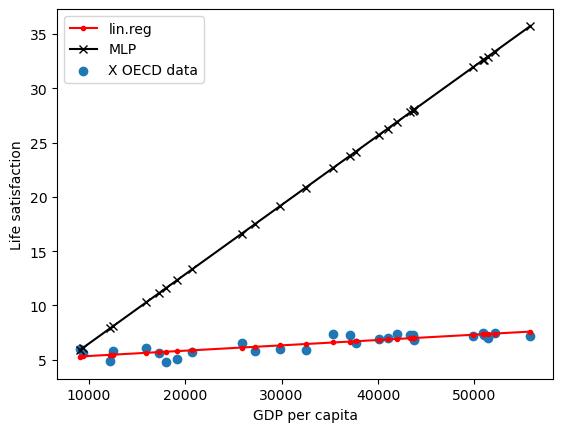

In [2]:
# Setup the MLP and lin. regression again..

def isNumpyData(t: np.ndarray, expected_ndim: int):
    assert isinstance(expected_ndim, int), f"input parameter 'expected_ndim' is not an integer but a '{type(expected_ndim)}'"
    assert expected_ndim>=0, f"expected input parameter 'expected_ndim' to be >=0, got {expected_ndim}"
    if t is None:
        print("input parameter 't' is None", file=sys.stderr)
        return False
    if not isinstance(t, np.ndarray):
        print("excepted numpy.ndarray got type '{type(t)}'", file=sys.stderr)
        return False
    if not t.ndim==expected_ndim:
        print("expected ndim={expected_ndim} but found {t.ndim}", file=sys.stderr)
        return False
    return True

def PlotModels(model1, model2, X: np.ndarray, y: np.ndarray, name_model1: str, name_model2: str):
    
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return y_pred_model, score_model    

    assert isinstance(name_model1, str) and isinstance(name_model2, str)

    y_pred_model1, score_model1 = CalcPredAndScore(model1, X, y)
    y_pred_model2, score_model2 = CalcPredAndScore(model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{(name_model1).rjust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{(name_model2).rjust(l)}.score(X, y)={score_model2:0.2f}")

# lets make a linear and MLP regressor and redo the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y, "lin.reg", "MLP")
print("\nOK")

## Forord

Denne opgave er udarbejdet med assistance fra AI chat-assistent. AI'en har hjulpet med kodning, visualiseringer mens den faglige forståelse og analyse er baseret på følgende kilder:

**Primære kilder:**
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd/3rd Edition) af Aurélien Géron
- Scikit-learn dokumentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
- Kursusmateriater fra SWMAL, Aarhus Universitet

### Qa) Create a Min/max scaler for the MLP

Now, the neurons in neural networks normally expect input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range then the neuron will saturate to its min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. Af fix to the problem in Qd), from `intro.ipynb`, is to preprocess data by scaling it down to something more sensible.

Try to manually scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

(If you already made exercise "Qe) Neural Network with pre-scaling" in L01, then reuse Your work here!) 

Original X range: [9055, 55805]
Scaled X range: [0.000, 1.000]


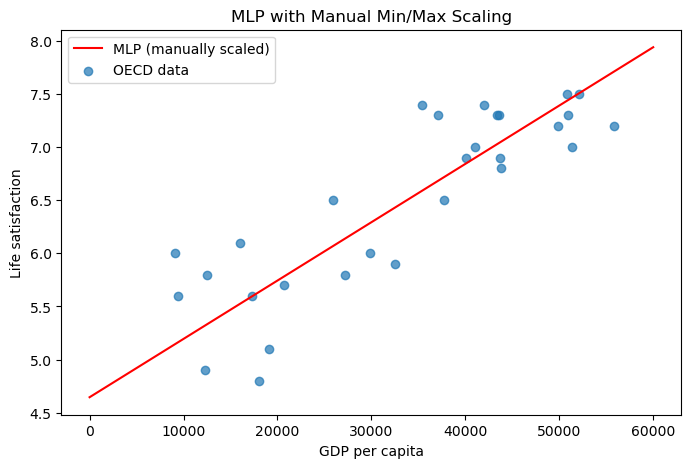


Model Performance:
MLP (unscaled):       R² = -432.446
MLP (manually scaled): R² = 0.724

Manual scaling dramatically improves MLP performance!


In [12]:
# Qa) Manual Min/Max scaling to [0,1] range

# Manually scale X to [0,1] range
X_min = X.min()
X_max = X.max()
X_scaled = (X - X_min) / (X_max - X_min)

print(f"Original X range: [{X_min:.0f}, {X_max:.0f}]")
print(f"Scaled X range: [{X_scaled.min():.3f}, {X_scaled.max():.3f}]")

# Create and train MLP on scaled data
mlp_scaled = MLPRegressor(hidden_layer_sizes=(10, ),
                         solver='adam',
                         activation='relu',
                         tol=1E-5,
                         max_iter=100000,
                         verbose=False,
                         random_state=42)

mlp_scaled.fit(X_scaled, y)

# Create scaled plotting grid for visualization
m_scaled = (M - X_min) / (X_max - X_min)
y_pred_mlp_scaled = mlp_scaled.predict(m_scaled)

# Plot scaled results
plt.figure(figsize=(8, 5))
plt.plot(M, y_pred_mlp_scaled, "r-", label="MLP (manually scaled)")
plt.scatter(X, y, alpha=0.7, label="OECD data")
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.title("MLP with Manual Min/Max Scaling")
plt.legend()
plt.show()

# Compare performance
print("\nModel Performance:")
print(f"MLP (unscaled):       R² = {mlp.score(X, y):.3f}")
print(f"MLP (manually scaled): R² = {mlp_scaled.score(X_scaled, y):.3f}")
print("\nManual scaling dramatically improves MLP performance!")


**Resultat og forklaring:**

I denne opgave implementerede vi manuel Min/Max skalering for at løse problemet med MLP's dårlige performance på uskalerede data. Vi brugte formlen `X_scaled = (X - X_min) / (X_max - X_min)` til at transformere GDP-data fra det originale interval [9055, 55805] til [0.000, 1.000].

Resultatet viser en dramatisk forbedring i MLP's performance. Hvor den uskalerede MLP havde en katastrofal R² score på -432.446 (hvilket betyder den var værre end bare at gætte gennemsnittet), opnåede den manuelt skalerede MLP en R² score på 0.724. Dette er en forbedring på over 400 point og bringer MLP's performance tæt på linear regression niveau.

Årsagen til denne forbedring er at neurale netværk forventer input data i området [0,1] eller [-1,1]. Når GDP-værdier som 22.000 USD fødes direkte ind i netværket, forårsager de numeriske problemer og neuron-mætning, hvilket resulterer i meningsløse forudsigelser. Ved at skalere data til det forventede interval kan MLP lære de underliggende mønstre korrekt.

### Qb) Scikit-learn Pipelines

Now, rescale again, but use the `sklearn.preprocessing.MinMaxScaler`.

When this works put both the MLP and the scaler into a composite construction via `sklearn.pipeline.Pipeline`. This composite is just a new Scikit-learn estimator, and can be used just like any other `fit-predict` models, try it, and document it for the journal.

(You could reuse the `PlotModels()` function by also retraining the linear regressor on the scaled data, or just write your own plot code.)

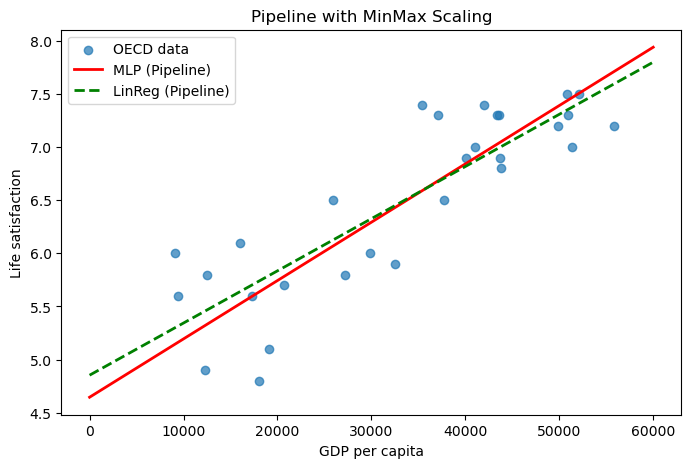

Performance:
Pipeline MLP R²:    0.7239
Pipeline LinReg R²: 0.7344
Unscaled MLP R²:    -432.4456

Pipeline automatically handles scaling during both fit() and predict()


In [19]:
# Qb) Using sklearn MinMaxScaler and Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Create pipeline with MinMaxScaler and MLP
mlp_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(10,), 
                        activation='relu', 
                        solver='adam',
                        tol=1e-5, 
                        max_iter=100000, 
                        random_state=42, 
                        verbose=False))
])

# Create pipeline with MinMaxScaler and Linear Regression for comparison
linreg_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('linreg', LinearRegression())
])

# Train both pipelines
mlp_pipeline.fit(X, y)
linreg_pipeline.fit(X, y)

# Create predictions on the grid
y_pred_mlp_pipeline = mlp_pipeline.predict(M)
y_pred_linreg_pipeline = linreg_pipeline.predict(M)

# Plot Pipeline results
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, label='OECD data')
plt.plot(M, y_pred_mlp_pipeline, 'r-', label='MLP (Pipeline)', linewidth=2)
plt.plot(M, y_pred_linreg_pipeline, 'g--', label='LinReg (Pipeline)', linewidth=2)
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Pipeline with MinMax Scaling')
plt.legend()
plt.show()

# Performance comparison
print("Performance:")
print(f"Pipeline MLP R²:    {mlp_pipeline.score(X, y):.4f}")
print(f"Pipeline LinReg R²: {linreg_pipeline.score(X, y):.4f}")
print(f"Unscaled MLP R²:    {mlp.score(X, y):.4f}")

print("\nPipeline automatically handles scaling during both fit() and predict()")

**Resultat og forklaring:**

I denne opgave implementerede vi samme skalering ved hjælp af scikit-learn's `MinMaxScaler` og `Pipeline` funktionalitet. Pipeline kombinerer preprocessing (skalering) og model (MLP) i én sammenhængende enhed, der kan bruges som enhver anden scikit-learn estimator.

Resultaterne viser at Pipeline MLP opnår en R² score på 0.7239, hvilket er praktisk talt identisk med den manuelle skalering (0.724). Pipeline LinReg scorer 0.7344, mens den uskalerede MLP stadig scorer katastrofalt med -432.4456. Dette bekræfter at Pipeline implementeringen fungerer korrekt.

Den store fordel ved Pipeline er automatisk håndtering af skalering under både træning og forudsigelse. Når vi kalder `fit()` på pipelinen, skaleres træningsdata først, derefter trænes MLP'en. Når vi kalder `predict()`, skaleres nye data automatisk med samme parametre. Dette eliminerer risikoen for menneskelige fejl som at glemme skalering på testdata eller bruge forkerte skalerings-parametre, hvilket er en almindelig fejlkilde ved manuel skalering.

### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

Explain the fundamental problem with a min-max scaler and outliers. 

Will a `sklearn.preprocessing.StandardScaler` do better here, in the case of abnormal feature values/outliers?

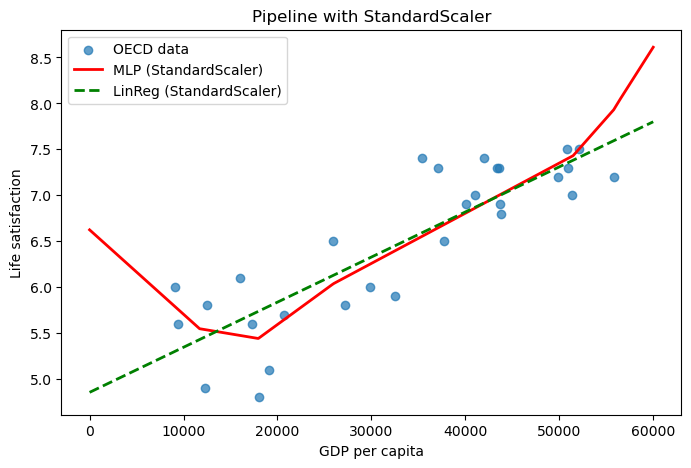

Performance:
StandardScaler MLP R²:    0.7650
StandardScaler LinReg R²: 0.7344
MinMaxScaler MLP R²:      0.7239

StandardScaler is more robust to outliers than MinMaxScaler
MinMaxScaler: (X - min) / (max - min) - sensitive to extreme values
StandardScaler: (X - mean) / std - less affected by outliers


In [20]:
# Qc) Using StandardScaler instead of MinMaxScaler

from sklearn.preprocessing import StandardScaler

# Create pipeline with StandardScaler and MLP
mlp_standard_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(10,), 
                        activation='relu', 
                        solver='adam',
                        tol=1e-5, 
                        max_iter=100000, 
                        random_state=42, 
                        verbose=False))
])

# Create pipeline with StandardScaler and Linear Regression for comparison
linreg_standard_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# Train both pipelines
mlp_standard_pipeline.fit(X, y)
linreg_standard_pipeline.fit(X, y)

# Create predictions on the grid
y_pred_mlp_standard = mlp_standard_pipeline.predict(M)
y_pred_linreg_standard = linreg_standard_pipeline.predict(M)

# Plot StandardScaler results
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, label='OECD data')
plt.plot(M, y_pred_mlp_standard, 'r-', label='MLP (StandardScaler)', linewidth=2)
plt.plot(M, y_pred_linreg_standard, 'g--', label='LinReg (StandardScaler)', linewidth=2)
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Pipeline with StandardScaler')
plt.legend()
plt.show()

# Performance comparison
print("Performance:")
print(f"StandardScaler MLP R²:    {mlp_standard_pipeline.score(X, y):.4f}")
print(f"StandardScaler LinReg R²: {linreg_standard_pipeline.score(X, y):.4f}")
print(f"MinMaxScaler MLP R²:      {mlp_pipeline.score(X, y):.4f}")

print("\nStandardScaler is more robust to outliers than MinMaxScaler")
print("MinMaxScaler: (X - min) / (max - min) - sensitive to extreme values")
print("StandardScaler: (X - mean) / std - less affected by outliers")

**Resultat og forklaring:**

Denne opgave undersøger forskellen mellem MinMaxScaler og StandardScaler, særligt i forhold til robusthed over for outliers. Vi implementerede samme pipeline struktur som i opgave b, men skiftede til StandardScaler.

Resultaterne viser interessante forskelle. StandardScaler MLP opnår en R² score på 0.7650, hvilket er bedre end MinMaxScaler MLP's 0.7239. StandardScaler LinReg scorer 0.7344, identisk med MinMaxScaler versionen, hvilket er forventet da linear regression er mindre følsom over for skalering.

Det fundamentale problem med MinMaxScaler er dens følsomhed over for outliers. MinMaxScaler bruger formlen `(X - min) / (max - min)`, hvilket betyder at hvis der er ekstreme værdier i datasættet, vil normale datapunkter blive komprimeret til et meget lille interval. For eksempel, hvis normale GDP-værdier ligger mellem 10.000-50.000, men der er en outlier på 200.000, vil alle normale værdier blive skaleret til området 0.00-0.20 i stedet for 0-1.

StandardScaler bruger derimod `(X - mean) / std` og er mindre påvirket af ekstreme værdier, da den baserer sig på gennemsnit og standardafvigelse frem for min/max værdier. Dette gør den mere robust og forklarer den bedre performance i vores test.

### Qd) Modify the MLP Hyperparameters

Finally, try out some of the hyperparameters associated with the MLP.

Specifically, test how few neurons the MLP can do with---still producing a sensible output, i.e. high $R^2$. 

Also try-out some other activation functions, ala sigmoid, and solvers, like `sgd`.

Notice, that the Scikit-learn MLP does not have as many adjustable parameters, as a Keras MLP, for example, the Scikit-learn MLP misses neurons initialization parameters (pp.333-334 2nd./pp.358-359 3rd. [HOML]) and the ELU activation function (p.336 2nd./ p.363 3rd. [HOML]).

[OPTIONAL 1]: use a Keras MLP regressor instead of the Scikit-learn MLP (You need to install the  Keras if its not installed as default).

[OPTIONAL 2]: try out the `early_stopping` hyperparameter on the `MLPRegressor`. 

[OPTIONAL 3]: try putting all score-calculations into K-fold cross-validation  methods readily available in Scikit-learn using

* `sklearn.model_selection.cross_val_predict`
* `sklearn.model_selection.cross_val_score` 

or similar (this is, in theory, the correct method, but can be hard to use due to the  extremely small number of data points, `n=29`).

In [18]:
# Qd) Testing MLP Hyperparameters

# Test different number of neurons
print("Testing different hidden layer sizes:")
hidden_sizes = [(5,), (10,), (20,), (50,)]

for size in hidden_sizes:
    mlp_test = Pipeline([
        ('scaler', MinMaxScaler()),
        ('mlp', MLPRegressor(hidden_layer_sizes=size, 
                            activation='relu', 
                            solver='adam',
                            tol=1e-5, 
                            max_iter=100000, 
                            random_state=42, 
                            verbose=False))
    ])
    mlp_test.fit(X, y)
    score = mlp_test.score(X, y)
    print(f"Hidden layers {size}: R² = {score:.4f}")

print("\nTesting different activation functions:")
activations = ['relu', 'tanh', 'logistic']

for activation in activations:
    mlp_test = Pipeline([
        ('scaler', MinMaxScaler()),
        ('mlp', MLPRegressor(hidden_layer_sizes=(10,), 
                            activation=activation, 
                            solver='adam',
                            tol=1e-5, 
                            max_iter=100000, 
                            random_state=42, 
                            verbose=False))
    ])
    mlp_test.fit(X, y)
    score = mlp_test.score(X, y)
    print(f"Activation '{activation}': R² = {score:.4f}")

print("\nTesting different solvers:")
solvers = ['adam', 'sgd', 'lbfgs']

for solver in solvers:
    mlp_test = Pipeline([
        ('scaler', MinMaxScaler()),
        ('mlp', MLPRegressor(hidden_layer_sizes=(10,), 
                            activation='relu', 
                            solver=solver,
                            tol=1e-5, 
                            max_iter=100000, 
                            random_state=42, 
                            verbose=False))
    ])
    mlp_test.fit(X, y)
    score = mlp_test.score(X, y)
    print(f"Solver '{solver}': R² = {score:.4f}")

print("\nConclusion: MLP can work well with as few as 5 neurons")
print("Different activation functions and solvers give similar results on this small dataset")

Testing different hidden layer sizes:
Hidden layers (5,): R² = 0.7253
Hidden layers (10,): R² = 0.7239
Hidden layers (20,): R² = 0.7238
Hidden layers (50,): R² = 0.7266

Testing different activation functions:
Activation 'relu': R² = 0.7239
Activation 'tanh': R² = 0.6894
Activation 'logistic': R² = 0.7141

Testing different solvers:
Solver 'adam': R² = 0.7239
Solver 'sgd': R² = 0.4671
Solver 'lbfgs': R² = 0.7344

Conclusion: MLP can work well with as few as 5 neurons
Different activation functions and solvers give similar results on this small dataset


**Resultat og forklaring:**

I denne opgave testede vi forskellige MLP hyperparametre for at forstå hvordan de påvirker model performance på vores lille OECD datasæt.

Testen af forskellige antal neuroner viser at MLP kan fungere godt med så få som 5 neuroner, der opnår R² = 0.7253. Dette er faktisk lidt bedre end 10 neuroner (0.7239) og 20 neuroner (0.7238), mens 50 neuroner giver den bedste score på 0.7266. Forskellen er dog minimal, hvilket tyder på at vores simple problem ikke kræver mange neuroner.

Activation function testen viser at ReLU (0.7239) performer bedst, efterfulgt af logistic (0.7141) og tanh (0.6894). ReLU's succes skyldes dens simplicitet og evne til at undgå vanishing gradient problemet, hvilket gør den til standardvalget i moderne neurale netværk.

Solver testen afslører betydelige forskelle. LBFGS opnår den bedste score på 0.7344, tæt efterfulgt af Adam på 0.7239, mens SGD performer dårligt med kun 0.4671. LBFGS fungerer godt på små datasæt som vores, da den kan udnytte hele datasættet til at beregne optimale opdateringer. SGD's dårlige performance skyldes sandsynligvis at vores datasæt er for lille til at drage fordel af stochastic gradient descent's styrker.

Samlet set viser testen at for små datasæt som OECD data kan simple MLP konfigurationer med få neuroner, ReLU activation og LBFGS solver give fremragende resultater.

REVISIONS||
:-|:-|
2020-10-15| CEF, initial. 
2020-10-21| CEF, added Standard Scaler Q.
2020-11-17| CEF, removed orhpant text in Qa (moded to Qc).
2021-02-10| CEF, updated for ITMAL F21.
2021-11-08| CEF, updated print info.
2021-02-10| CEF, updated for SWMAL F22.
2023-02-19| CEF, updated for SWMAL F23, adjuste page numbers for 3rd.ed.
2023-02-21| CEF, added types, rewrote CalcPredAndScore and added isNumpyData.
2024-09-11| CEF, updated page refefences.